In [1]:
!pip install torch -q

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import random
from tqdm.notebook import tqdm

from sklearn.metrics import accuracy_score


sns.set(style="darkgrid", font_scale=1.4)


In [3]:
SEED = 42

torch.manual_seed(SEED)

torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)


np.random.seed(SEED)


random.seed(SEED)

In [4]:
torch.backends.cudnn.deterministic = False
torch.use_deterministic_algorithms(False)

In [5]:
X, y = make_moons(n_samples=10000, noise=0.12, random_state=42)

In [6]:
X

array([[ 0.48781306, -0.10898247],
       [-0.64896681,  0.01023602],
       [ 0.40367794,  0.77246144],
       ...,
       [-0.05161421,  0.24301885],
       [ 0.87226867,  0.5250472 ],
       [ 1.22590134, -0.3578842 ]])

# Построим график scatterplot для визуализации данных из датафрейма X

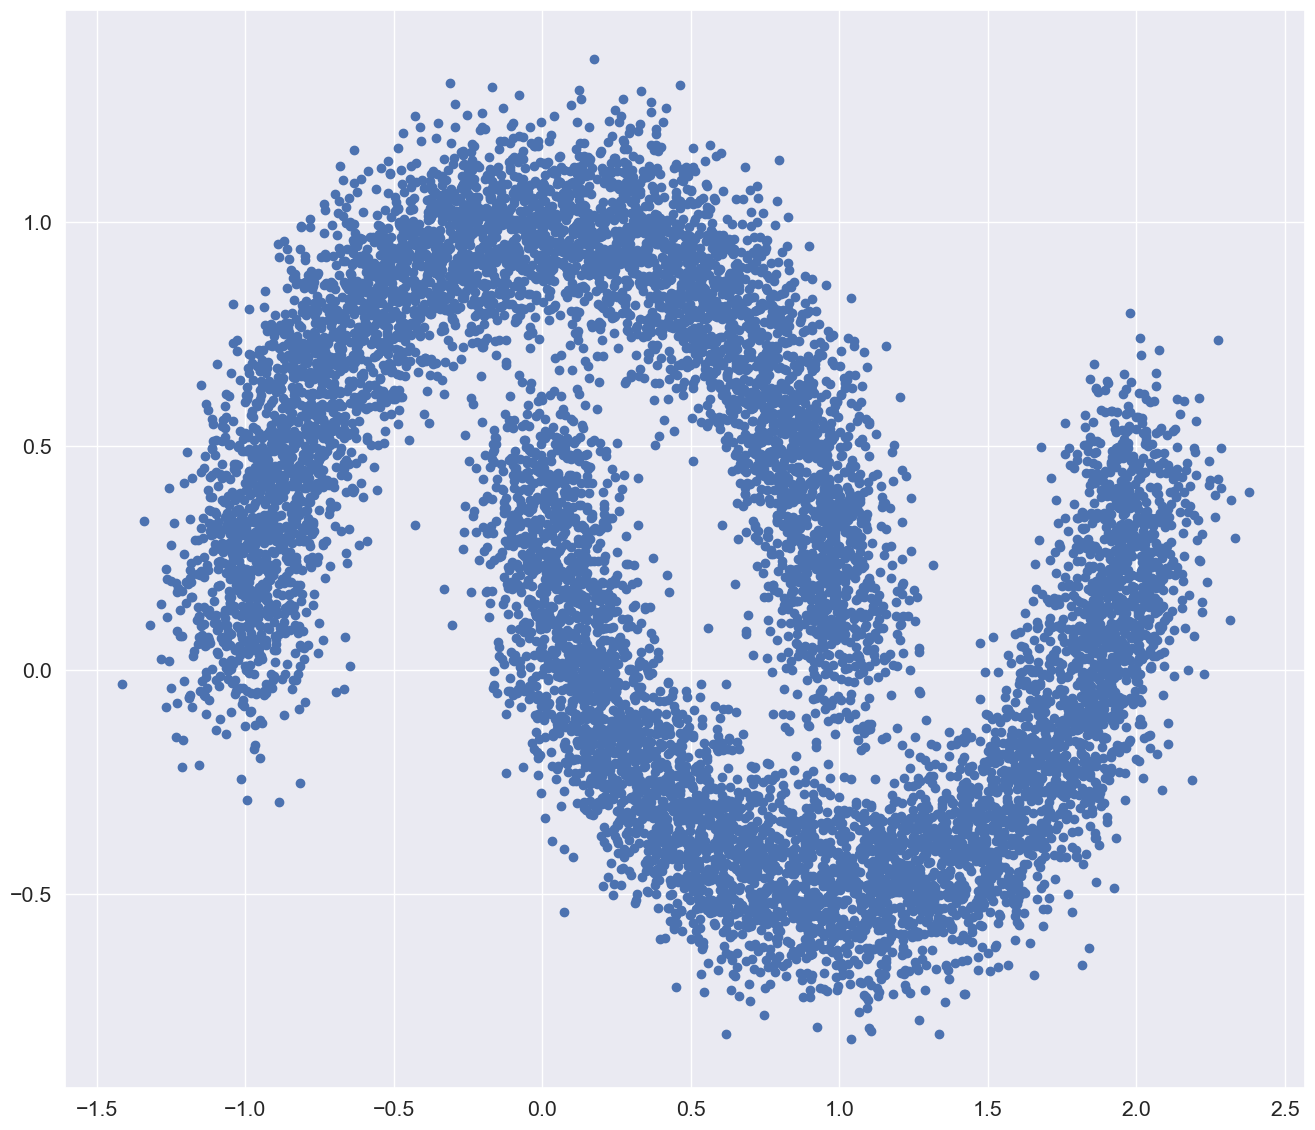

In [7]:
plt.figure(figsize=(16,14))
plt.scatter(X[:,0],X[:,1])
plt.show()

# Преобразуем данные в DataLoader

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(y_train)
y_test_tensor = torch.FloatTensor(y_test)

In [10]:
train_TensorDataset = TensorDataset(X_train_tensor, y_train_tensor)

test_TensorDataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_TensorDataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_TensorDataset, batch_size=128, shuffle=False)


#Составим нейронную сеть

In [11]:
class Net_moon(nn.Module):
  def __init__(self):
    super(Net_moon, self).__init__()

    self.lnr1 = nn.Linear(2, 4)
    self.act1 = nn.ReLU()

    self.lnr2 = nn.Linear(4,4)
    self.act2 = nn.ReLU()

    self.lnr3 = nn.Linear(4,2)

  def forward(self, x):

    x = self.lnr1(x)
    x = self.act1(x)

    x = self.lnr2(x)
    x = self.act2(x)

    x = self.act3(x)

    return x

In [36]:
model = Net_moon()
loss = nn.CrossEntropyLoss()

# Напишем функции для обучения и валидации модели

In [ ]:
def train_model(model, num_epochs, train_dataloaders, optimizer, loss_func):


  loss_list = []
  accuracy_list = []
  number_elements = 0


  model.train()
  for X_batch, y_batch in tqdm(train_dataloaders):

    optimizer.zero_grad()
    outp = model(X_batch)
    loss = loss_func(outp, y_batch)
    loss.backward()
    optimizer.step()
    y_pred = torch.argmax(outp, dim=1)

    loss_list.append(loss)

    number_elements






